<a href="https://colab.research.google.com/github/SarushanThiy/Tesla-Stock-Analysis/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import all Libraries

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os.path
%matplotlib inline

In [20]:
# Get the data from the csv file and place into a data frame
# dataset=pd.read_csv(r'C:\Users\sarus\Documents\TSLA.csv')
dataset = pd.read_csv(r"/content/TSLA.csv")
dataset.head(n=6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [21]:
# Count the number of rows and columns in the data
dataset.shape

(3068, 7)

In [22]:
# remove adjusted close column as it is a repetition of the close column and load dataframe
dataset.drop('Adj Close', axis = 1, inplace = True)
dataset.head(n=6)

,Date,Open,High,Low,Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,103825500


In [23]:
# Define the dependant varible (y) and non-dependant variable (x)
x  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [24]:
print(x)

            Open        High         Low     Volume
0       1.266667    1.666667    1.169333  281494500
1       1.719333    2.028000    1.553333  257806500
2       1.666667    1.728000    1.351333  123282000
3       1.533333    1.540000    1.247333   77097000
4       1.333333    1.333333    1.055333  103003500
...          ...         ...         ...        ...
3063  282.829987  287.739990  280.700012   41864700
3064  287.869995  288.480011  272.649994   50541800
3065  280.619995  281.250000  271.809998   52107300
3066  272.579987  277.579987  266.149994   54287000
3067  281.070007  282.350006  269.079987   50752200

[3068 rows x 4 columns]


In [25]:
# Create test and train variables using test_train_splot from sklearn library
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # Test size is 30% of data train size is 70% of data
print(x_train.shape, y_train.shape) #2147 members
print(x_test.shape, y_train.shape) #921 members

(2147, 4) (2147,)
(921, 4) (2147,)


In [26]:
# Fit the linear regression model
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [27]:
# Predict based on non-dependant values and show first 10 predictions
y_pred=ml.predict(x_test)
y_pred[0:10]

array([ 16.07009634,  21.3674511 ,  18.92549616,  32.86331339,
        15.92063541,   1.36846879,   2.07678542, 205.76772827,
        19.86618074,   2.00201335])

In [28]:
print('Score:',r2_score(y_test,y_pred))

Score: 0.9997026816302715


In [29]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 0.556793200423796


In [30]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared  Error: 2.382239146894963


In [31]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squared Error: 1.5434504031211898


Text(0.5, 1.0, 'Plot of Predicted vs Actual')

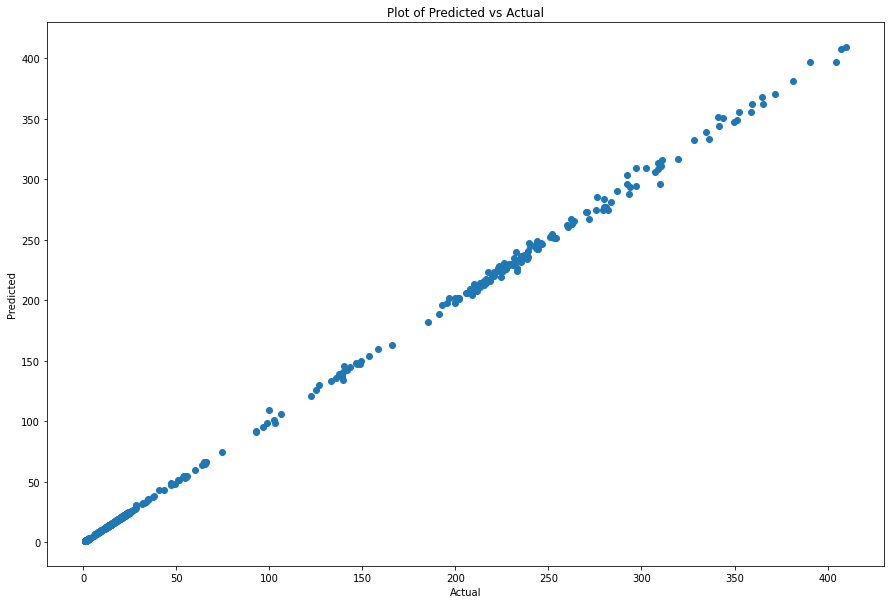

In [32]:
#Plot the predctions in a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Plot of Predicted vs Actual')

In [33]:
# Add predictions and the difference between actual and predcicted values into  single dataframe for comparison.
# Can also be imported into a csv file 
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred })
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
2222,16.098000,16.070096,0.027904
2028,21.348667,21.367451,-0.018784
1954,19.129333,18.925496,0.203837
2398,32.809334,32.863313,-0.053979
1496,15.701333,15.920635,-0.219302
84,1.400000,1.368469,0.031531
511,2.099333,2.076785,0.022548
2761,205.533340,205.767728,-0.234388
2072,19.888666,19.866181,0.022485
540,2.000667,2.002013,-0.001346
